# TNG100-1 Property Distributions

In this notebook, we visualize the distribution of halo and galaxy properties in the IllustrisTNG simulations.

In [1]:
import socket
on_binder = 'jupyter' in socket.gethostname()

In [2]:
import numpy as np
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'xx-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
import socket
import sys
import h5py
import matplotlib.gridspec as gridspec

# shouldn't need this if have illustris_python properly in python path! todo: check if fixed upon reload
if not on_binder:
    sys.path.insert(1, '/home/ksf293/external')
    import illustris_python as il

sys.path.insert(1, '../code')
from featurize_and_fit import Featurizer
import plotter
import utils

%load_ext autoreload
%autoreload 2

## Load in simulation data

Set up paths and variables:

In [3]:
sim_name = 'TNG100-1'
sim_name_dark = 'TNG100-1-Dark'
#sim_name = 'TNG50-4'

if on_binder:
    base_dir = '/home/jovyan/SimulationData'
    sim_name = utils.get_alt_sim_name(sim_name)
    sim_name_dark = utils.get_alt_sim_name(sim_name_dark)
else:
    base_dir = '/scratch/ksf293/equivariant-cosmology/data'
    
snap_num_str = '099' # z = 0
mass_multiplier = 1e10

Load in halos:

In [4]:
featurizer = Featurizer(base_dir, sim_name, sim_name_dark, snap_num_str)
featurizer.load_halo_dicts(num_star_particles_min=1, halo_mass_min=10**14,
                           halo_mass_min_str='1e14', halo_mass_difference_factor=3.0,
                           force_reload=True)

Halo file ../data/halo_dicts_TNG100-1_nstarmin1_hmassmin1e14_mdifffac3.0.npy does not exist, computing


In [5]:
print('Number dark halos in dark sim:', len(featurizer.idxs_halos_dark_all))
print('Number halos after matching and cuts:', len(featurizer.halo_dicts))

Number dark halos in dark sim: 4231400
Number halos after matching and cuts: 15


## Plot property distributions of entire simulation

In [6]:
# If we loaded in the halos from dict, we won't have access to all the data!
if not featurizer.has_read_simulations:
    featurizer.read_simulations()

In [7]:
ipart_dm = featurizer.ipart_dm
ipart_star = featurizer.ipart_star

### Number of particles per halo

In [8]:
mask_has_stars = np.where(featurizer.halos_hydro['GroupLenType'][:,ipart_star]>0)[0]

featurizer.halos_dark['GroupFirstSub'] = featurizer.halos_dark['GroupFirstSub'].astype('int32')
mask_has_subhalos = np.where(featurizer.halos_dark['GroupFirstSub'] >= 0)[0] # filter out halos with no subhalos (-1 means no subhalo)

In [9]:
print('Number of dark halos:', featurizer.halos_dark['count'])
print('Number of dark halos with >=1 subhalo:', len(mask_has_subhalos))
print('Number of hydro halos:',featurizer. halos_hydro['count'])
print('Number of hydro halos with star particles:', len(mask_has_stars))

Number of dark halos: 4231400
Number of dark halos with >=1 subhalo: 3732158
Number of hydro halos: 6291349
Number of hydro halos with star particles: 228987


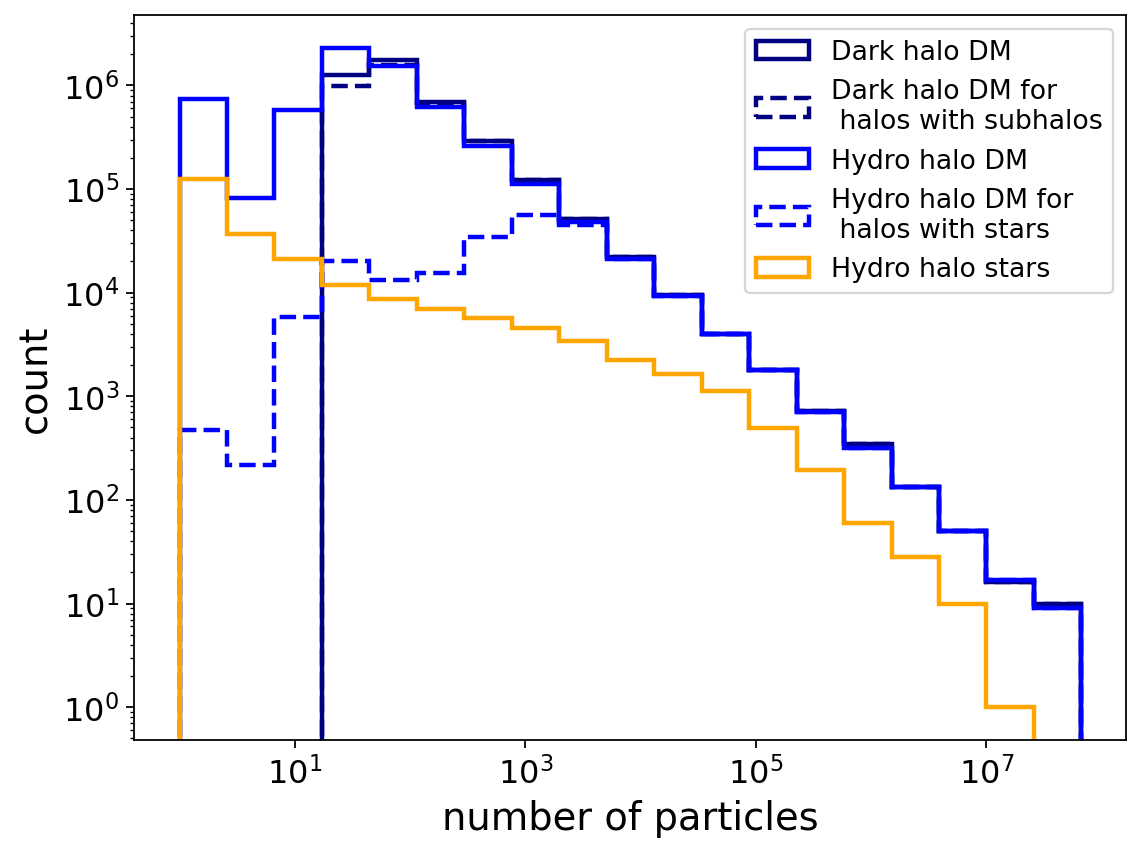

In [10]:
plt.figure(figsize=(8,6))

# all halos in sims
n_bins = 20
bins = np.logspace(np.log10(1), np.log10(max(featurizer.halos_hydro['GroupLenType'][:,ipart_dm])), n_bins)
_ = plt.hist(featurizer.halos_dark['GroupLenType'][:,ipart_dm], bins=bins, log=True, histtype='step', 
             color='navy', lw=2, label='Dark halo DM')
_ = plt.hist(featurizer.halos_dark['GroupLenType'][:,ipart_dm][mask_has_subhalos], bins=bins, log=True, histtype='step', 
             color='navy', lw=2, ls='--', label='Dark halo DM for \n halos with subhalos')
_ = plt.hist(featurizer.halos_hydro['GroupLenType'][:,ipart_dm], bins=bins, log=True, histtype='step', 
             color='blue', lw=2, label='Hydro halo DM')
_ = plt.hist(featurizer.halos_hydro['GroupLenType'][:,ipart_dm][mask_has_stars], bins=bins, log=True, histtype='step', 
             color='blue', lw=2, ls='--', label='Hydro halo DM for \n halos with stars')
_ = plt.hist(featurizer.halos_hydro['GroupLenType'][:,ipart_star], bins=bins, log=True, histtype='step', 
             color='orange', lw=2, label='Hydro halo stars')

plt.xscale('log')
plt.xlabel('number of particles')
plt.ylabel('count')
plt.legend(fontsize=12)

### Mass of halo

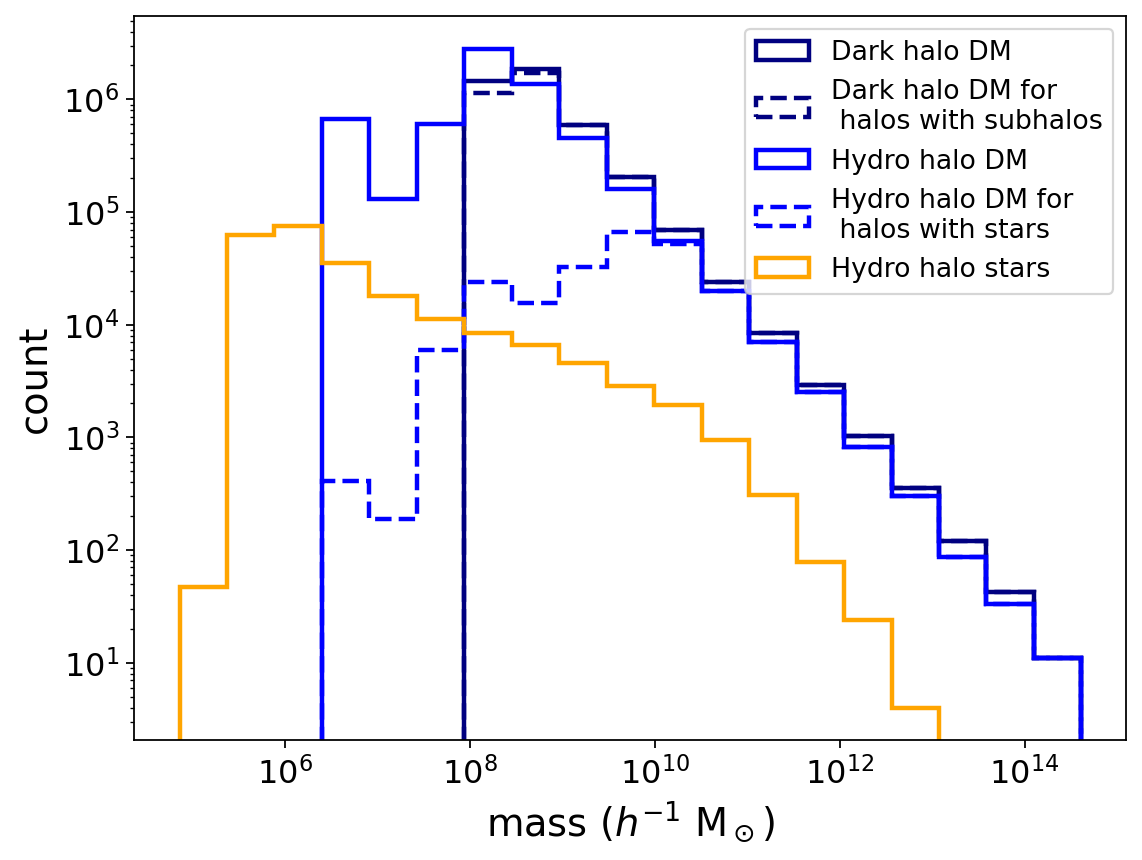

In [11]:
plt.figure(figsize=(8,6))

n_bins = 20
bins = np.logspace(np.log10(min(featurizer.halos_hydro['GroupMassType'][:,ipart_star][np.nonzero(featurizer.halos_hydro['GroupMassType'][:,ipart_star])])*mass_multiplier), 
                   np.log10(max(featurizer.halos_dark['GroupMassType'][:,ipart_dm])*mass_multiplier), n_bins)
_ = plt.hist(featurizer.halos_dark['GroupMassType'][:,ipart_dm]*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='navy', lw=2, label='Dark halo DM')
_ = plt.hist(featurizer.halos_dark['GroupMassType'][:,ipart_dm][mask_has_subhalos]*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='navy', lw=2, ls='--', label='Dark halo DM for \n halos with subhalos')
_ = plt.hist(featurizer.halos_hydro['GroupMassType'][:,ipart_dm]*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='blue', lw=2, label='Hydro halo DM')
_ = plt.hist(featurizer.halos_hydro['GroupMassType'][:,ipart_dm][mask_has_stars]*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='blue', lw=2, ls='--', label='Hydro halo DM for \n halos with stars')
_ = plt.hist(featurizer.halos_hydro['GroupMassType'][:,ipart_star]*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='orange', lw=2, label='Hydro halo stars')

plt.xscale('log')
plt.xlabel(r'mass ($h^{-1}$ M$_\odot)$')
plt.ylabel('count')
plt.legend(fontsize=12)

## Plot property distributions for our *matched* halo set:

In [12]:
mass_dark_halo_dm = np.array([halo_dict['mass_dark_halo_dm'] for halo_dict in featurizer.halo_dicts])
mass_hydro_halo_dm = np.array([halo_dict['mass_hydro_halo_dm'] for halo_dict in featurizer.halo_dicts])
mass_hydro_halo_star = np.array([halo_dict['mass_hydro_halo_star'] for halo_dict in featurizer.halo_dicts])
mass_hydro_halo_all = np.array([halo_dict['mass_hydro_halo'] for halo_dict in featurizer.halo_dicts])
mass_hydro_subhalo_star = np.array([halo_dict['mass_hydro_subhalo_star'] for halo_dict in featurizer.halo_dicts])

### Mass of (sub)halo

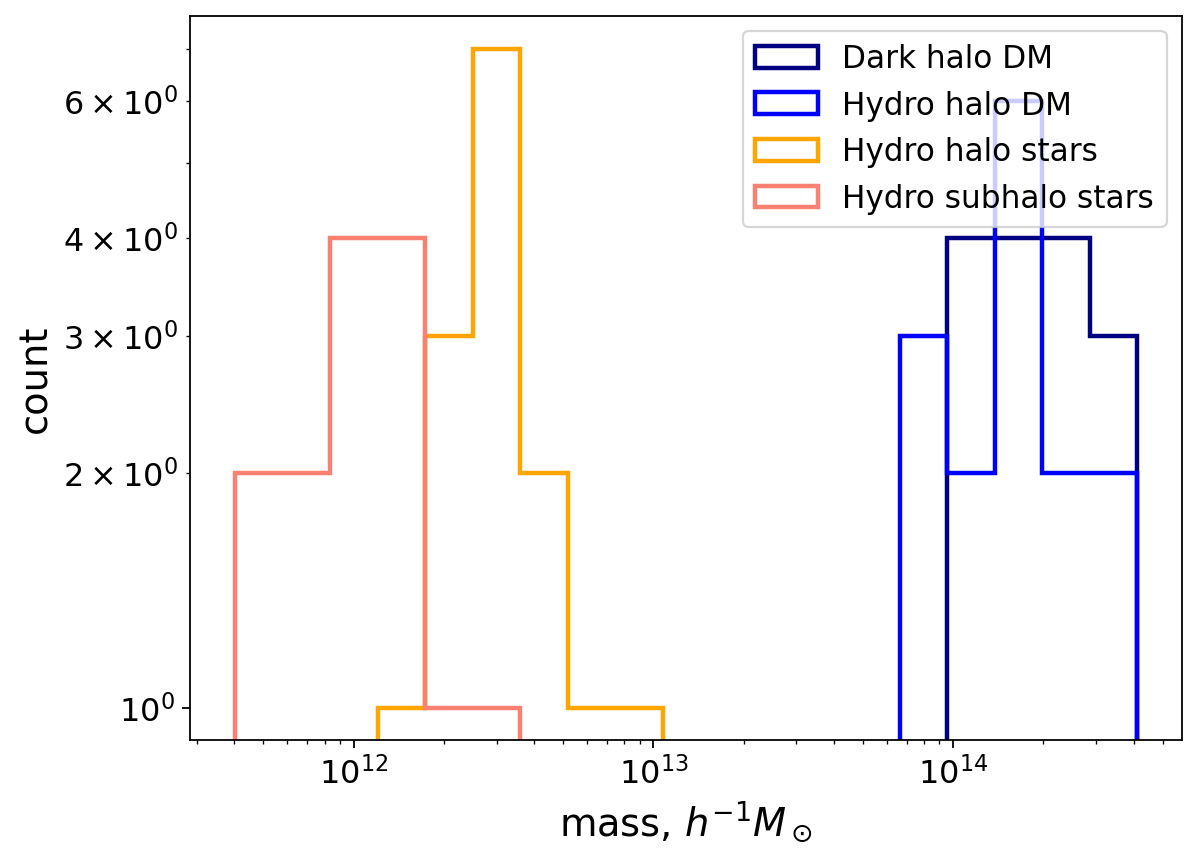

In [13]:
plt.figure(figsize=(8,6))

n_bins = 20
bins = np.logspace(np.log10(min(mass_hydro_subhalo_star[np.nonzero(mass_hydro_subhalo_star)])*mass_multiplier), 
                   np.log10(max(mass_dark_halo_dm)*mass_multiplier), n_bins)
_ = plt.hist(mass_dark_halo_dm*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='navy', lw=2, label='Dark halo DM')
_ = plt.hist(mass_hydro_halo_dm*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='blue', lw=2, label='Hydro halo DM')
_ = plt.hist(mass_hydro_halo_star*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='orange', lw=2, label='Hydro halo stars')
_ = plt.hist(mass_hydro_subhalo_star*mass_multiplier, bins=bins, log=True, histtype='step', 
             color='salmon', lw=2, label='Hydro subhalo stars')

plt.xscale('log')
plt.xlabel('mass, $h^{-1} M_\odot$')
plt.ylabel('count')
plt.legend(fontsize=14)

In [14]:
print(min(mass_hydro_halo_star[np.nonzero(mass_hydro_halo_star)[0]]), max(mass_hydro_halo_star))
print(len(mass_hydro_halo_star), len(np.nonzero(mass_hydro_halo_star)[0]))

154.06927 747.9899
15 15


### Mass of hydro vs DM halo

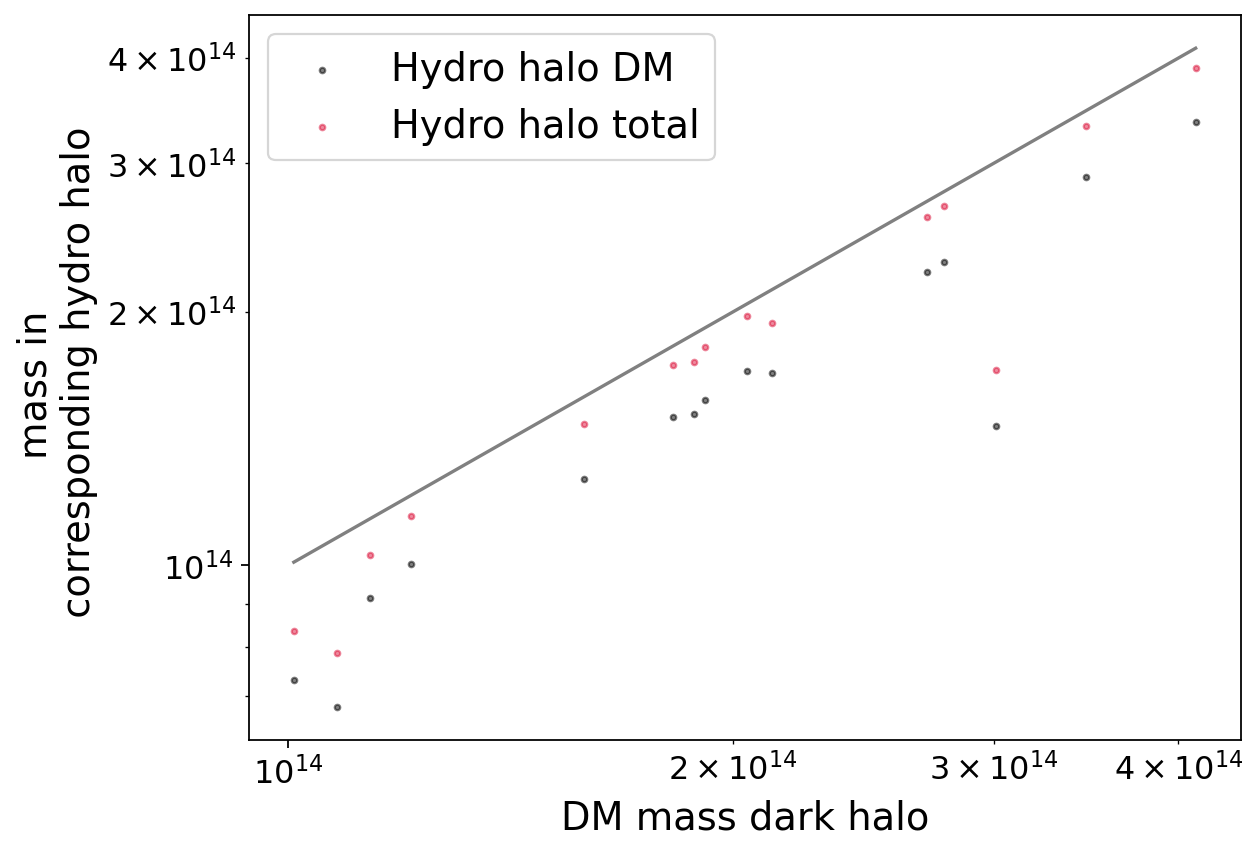

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(mass_dark_halo_dm*mass_multiplier, mass_hydro_halo_dm*mass_multiplier, s=6, alpha=0.5,
            c='k', label='Hydro halo DM')
plt.scatter(mass_dark_halo_dm*mass_multiplier, mass_hydro_halo_all*mass_multiplier, s=6, alpha=0.5, 
            c='crimson', label='Hydro halo total')
plt.xlabel("DM mass dark halo")
plt.ylabel("mass in \n corresponding hydro halo")
plt.xscale('log')
plt.yscale('log')

mmin, mmax = [min(mass_dark_halo_dm[np.nonzero(mass_dark_halo_dm)])*mass_multiplier, 
              max(mass_dark_halo_dm)*mass_multiplier]
xx = np.linspace(mmin, mmax, 2)
plt.plot(xx, xx, color='grey')

plt.legend()

### Stellar mass of hydro halo vs DM mass of dark halo

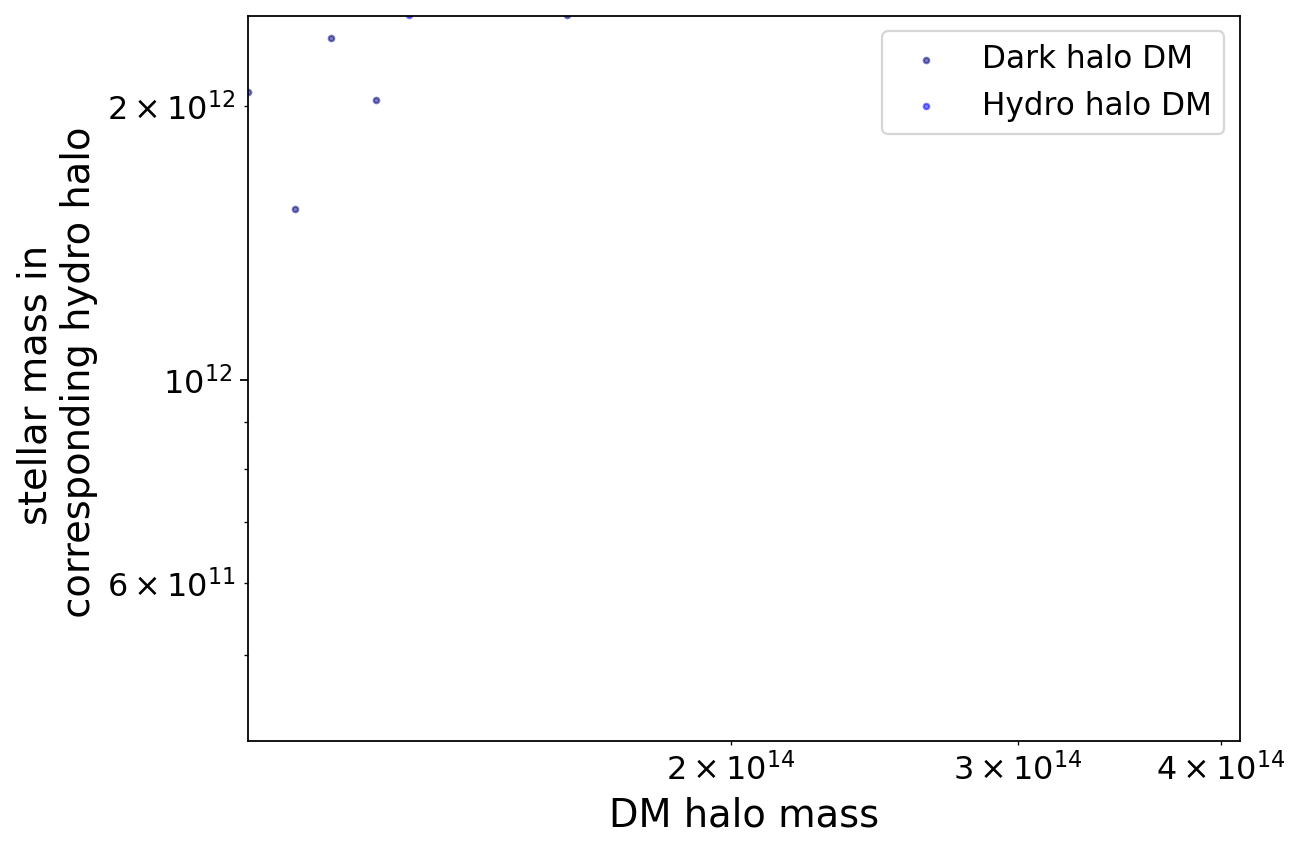

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(mass_dark_halo_dm*mass_multiplier, mass_hydro_halo_star*mass_multiplier, 
            s=6, alpha=0.5, c='navy', label='Dark halo DM')
plt.scatter(mass_hydro_halo_dm*mass_multiplier, mass_hydro_halo_star*mass_multiplier, 
            s=6, alpha=0.5, c='blue', label='Hydro halo DM')

plt.xlabel("DM halo mass")
plt.ylabel("stellar mass in \n corresponding hydro halo")
plt.xscale('log')
plt.yscale('log')
plt.xlim([min(mass_dark_halo_dm[np.nonzero(mass_dark_halo_dm)])*mass_multiplier, 
          max(mass_dark_halo_dm)*mass_multiplier])
plt.ylim([min(mass_hydro_subhalo_star[np.nonzero(mass_hydro_subhalo_star)])*mass_multiplier, 
          max(mass_hydro_subhalo_star)*mass_multiplier])

plt.legend(fontsize=14)

## Plot a sample of halos

In [17]:
nrows = 2
ncols = 3
np.random.seed(17)
i_hds = np.random.randint(featurizer.N_halos, size=nrows*ncols)
titles = [f'halo_dict ID {i_hd}' for i_hd in i_hds]
plotter.plot_halos_dark_and_hydro(featurizer.halo_dicts[i_hds], featurizer.base_path_dark, 
                                  featurizer.base_path_hydro, featurizer.snap_num,
                                  nrows, ncols, titles)

KeyboardInterrupt: 

<Figure size 1320x1600 with 0 Axes>